# Implementation of A* search algorithm (Python 3.6)

In [48]:
import numpy as np
from functools import reduce
from collections import defaultdict
import matplotlib.pyplot as plt

def a_star(start, target, grid_size, num_obstacles = 0, obstacles = []):
                
    # Initialize coordinates of cells in coordinate grid
    cells = [(i,j) for i in range(grid_size+1) for j in range(grid_size+1)]
    
    # Initialize complex valued coordinate vector (i.e. 1,1 = 1+1i)
    ## Using complex values b/c abs(1+1i) = sqrt(2), so abs(1+1i - 0+0i) = sqrt(2) = euclidean distance 
    ### Complex values are essentially coordinate pairs for purposes of calculating euclidean distance
    complex_val_array = np.array([complex(c[0], c[1]) for c in cells])
    
    # Meshgrid creates two arrays, one containing y and one containing x coordinate values for each cell in desired grid 
    ## First point in complex_val_array is broadcast to first col of y, first row of x, etc.
    y, x = np.meshgrid(complex_val_array, complex_val_array)
    
    # First column/row contains euclidean distance from first cell to each other cell
    ## (0,1) = distance from first point to second point
    ### (3,5) = distance from 4th point to 6th point
    dist_mat = abs(y-x)
    
    parent_dict = defaultdict()
    path_list = []
    og_path_list = []
    closed_list = []
    open_list = [start]
    
    # Randomly initializing obstacles    
    if (obstacles == []) & (num_obstacles != 0):
        obstacles = [(np.random.randint(grid_size),np.random.randint(grid_size)) for blocked_cell in range(num_obstacles)]
        if start in obstacles:
            obstacles.remove(start)
            obstacles.append( (start[0] + np.floor( grid_size/2 ) , start[1] + np.floor( grid_size / 2 ) ) ) # Adding new obstacle if start was in obstacles
        if target in obstacles:
            obstacles.remove(target)
            obstacles.append( (start[0] - np.floor( grid_size/2 ) , start[1] - np.floor( grid_size / 2 ) ) ) # Adding new obstacle if target was in obstacles
        
    # Searching until target is found and loop breaks
    while True:
                                    
        min_cost = np.inf
        min_cost_cell = ''
        
        # Searching for cell in open_list with lowest f_cost
        for cell in open_list:
            
            if cell in obstacles:
                continue
            
            # Distance from start
            g_cost = dist_mat[cells.index(cell), cells.index(start)]
        
            # Distance from target
            h_cost = dist_mat[cells.index(cell), cells.index(target)]
            
            f_cost = g_cost + h_cost
            
            if f_cost < min_cost:
                
                min_cost = f_cost
                
                min_cost_cell = cell
                
        if min_cost_cell == target:
                      
            break
        
        # Assigning cell with min f_cost to current, adding it to closed list and removing it from open list
        current_cell = min_cost_cell         
        
        closed_list.append(current_cell)    
        
        # Open list is empty when there are no more possible moves
        try:
            open_list.remove(current_cell)
        except: # Breaks when obstacles enclose starting point
            print('No path from start to target.\n')
            break
                       
        # Calculating neighbors of current_cell
        neighbor_list = [cell for cell in cells if np.sqrt( (cell[0] - current_cell[0])**2 + (cell[1]-current_cell[1])**2 ) <= np.sqrt(2)]
        
        # Checking whether we encountered new cell(s) or have found shorter paths to cell(s) we previously encountered
        for neighbor in neighbor_list:
            
            if (neighbor in closed_list) or (neighbor in obstacles):
                continue
            
            
            # Calculating current_cell path        
            path_list = [neighbor, current_cell]
            
            current_parent = current_cell
        
            while current_parent in parent_dict.keys():
                
                path_list.append(parent_dict[current_parent])
                
                current_parent = parent_dict[current_parent]
                
            # Calculating original path
            og_path_list = [neighbor]
            
            og_parent = neighbor
        
            while og_parent in parent_dict.keys():
                
                og_path_list.append(parent_dict[og_parent])
                
                og_parent = parent_dict[og_parent]
        
        
            # Calculating distance of current path to neighbor
            current_path_dist = reduce((lambda x, y : x + y), [dist_mat[cells.index(cell), cells.index(start)] for cell in path_list])
            
            # Calculating distance of original path to neighbor
            og_path_dist = reduce((lambda x, y : x + y), [dist_mat[cells.index(cell), cells.index(start)] for cell in og_path_list])
                                        
            # If we found a shorter path to neighbor or have not encountered neighbor before...
            if (og_path_dist > current_path_dist) or (neighbor not in open_list):
                
                parent_dict[neighbor] = current_cell # Re-assigning neighbor's parent if new path is shorter
                           
                if neighbor not in open_list:
                    
                    open_list.append(neighbor)
                    
    try:           
        return({'Path: ': path_list[::-1], 'Distance: ' : f_cost, 'Grid Dim: ' : grid_size, 'Blocked Cells: ':obstacles})
    except:
        print('No move from start, try again.')

In [49]:
# Calling function
shortest_path_dict = a_star(start = (0,0), target = (30,30), grid_size = 30, num_obstacles = 500) 

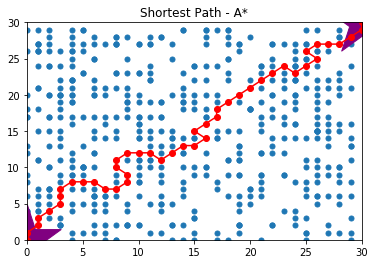

In [50]:
# Plotting shortest path
plt.title('Shortest Path - A*')
plt.ylim([0,shortest_path_dict['Grid Dim: ']])
plt.xlim([0,shortest_path_dict['Grid Dim: ']])
x_path = [shortest_path_dict['Path: '][idx][0] for idx in range(len(shortest_path_dict['Path: ']))]
y_path = [shortest_path_dict['Path: '][idx][1] for idx in range(len(shortest_path_dict['Path: ']))]
x_blocked = [shortest_path_dict['Blocked Cells: '][idx][0] for idx in range(len(shortest_path_dict['Blocked Cells: ']))]
y_blocked = [shortest_path_dict['Blocked Cells: '][idx][1] for idx in range(len(shortest_path_dict['Blocked Cells: ']))]
plt.scatter(np.array(x_blocked), np.array(y_blocked), marker='.', s = 100)
plt.scatter(np.array([x_path[len(x_path)-1], x_path[0]]), np.array([y_path[len(y_path)-1], y_path[0]]), marker='*', s = 5000, color = 'purple')
plt.plot(np.array(x_path), np.array(y_path), 'ro-')
plt.show()